In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
def running_avg(x, n_windows):
    '''Computes a running average over x'''
    ws = int(len(x)/n_windows)  # size of each window
    return [np.sum(x[i*ws:i*ws+ws])/ws for i in range(int(len(x)/ws))]

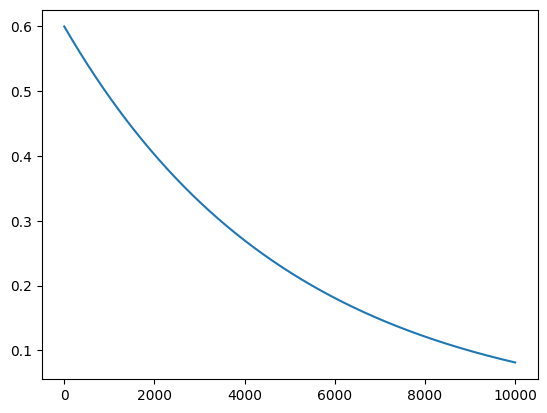

In [4]:
decay = 0.6 * (0.9998 ** np.arange(10_000))
plt.plot(decay)

# Error plot

In [7]:
list_dir = [
    "/home/gianvito/Desktop/flatland_exp/100_agents_challenge/exp_0/seed_0",
    "/home/gianvito/Desktop/flatland_exp/100_agents_challenge/exp_0/seed_1",
    "/home/gianvito/Desktop/flatland_exp/100_agents_challenge/exp_0/seed_2",
    "/home/gianvito/Desktop/flatland_exp/100_agents_challenge/exp_0/seed_3",
    "/home/gianvito/Desktop/flatland_exp/100_agents_challenge/exp_0/seed_4",
]

namefile = "cum_reward_checkpoint_3000.npz"

In [8]:
num_episodes = 3_000
n_windows = 500

aggr_rew = np.zeros((len(list_dir), num_episodes))

for i, out_dir in enumerate(list_dir):
    cum_reward = np.load(os.path.join(out_dir, namefile))
    aggr_rew[i, :] = cum_reward["x"][:num_episodes]

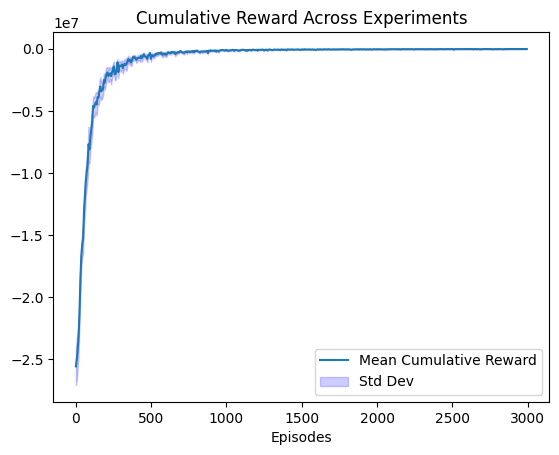

In [9]:
fig, ax = plt.subplots()

ax.plot(np.arange(0, num_episodes, num_episodes/n_windows),
        running_avg(np.mean(aggr_rew, axis=0), n_windows), label='Mean Cumulative Reward')
ax.fill_between(np.arange(0, num_episodes, num_episodes/n_windows),
                running_avg(np.mean(aggr_rew, axis=0) - np.std(aggr_rew, axis=0) / np.sqrt(aggr_rew.shape[0]), n_windows),
                running_avg(np.mean(aggr_rew, axis=0) + np.std(aggr_rew, axis=0) / np.sqrt(aggr_rew.shape[0]), n_windows),
                color='b', alpha=0.2, label='Std Dev')
ax.set_title('Cumulative Reward Across Experiments')
ax.set_xlabel('Episodes')
ax.legend()

In [34]:
filename = "arrived_trains_checkpoint_3000.npz"
cat = True

aggr_trains = np.zeros((len(list_dir), num_episodes))
for i, out_dir in enumerate(list_dir):
    arrived_trains = np.load(os.path.join(out_dir, filename))
    if cat:
        xfile = arrived_trains["x"]
        aggr_trains[i, :] = np.concatenate((xfile,[xfile[-1]]))
    else:
        aggr_trains[i, :] = arrived_trains["x"]

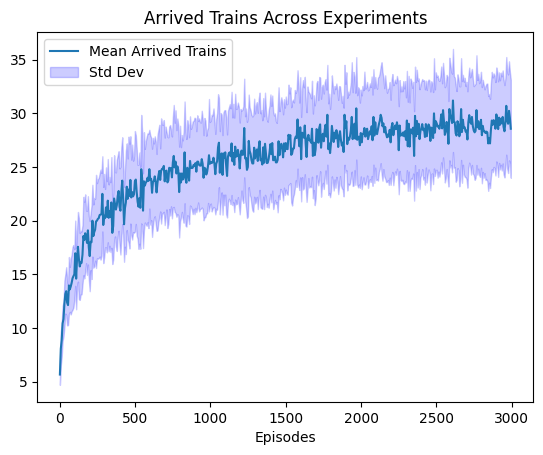

In [35]:
fig, ax = plt.subplots()

ax.plot(np.arange(0, num_episodes, num_episodes/n_windows),
        running_avg(np.mean(aggr_trains, axis=0), n_windows), label='Mean Arrived Trains')
ax.fill_between(np.arange(0, num_episodes, num_episodes/n_windows),
                running_avg(np.mean(aggr_trains, axis=0) - np.std(aggr_trains, axis=0) / np.sqrt(aggr_trains.shape[0]), n_windows),
                running_avg(np.mean(aggr_trains, axis=0) + np.std(aggr_trains, axis=0) / np.sqrt(aggr_trains.shape[0]), n_windows),
                color='b', alpha=0.2, label='Std Dev')
ax.set_title('Arrived Trains Across Experiments')
ax.set_xlabel('Episodes')
ax.legend()


# Exploit

In [62]:
exploit_freq=100
n_windows_exploit = 20
num_exploit = int(num_episodes/exploit_freq)
exploit_rew = np.zeros((len(list_dir), num_exploit))

for i, out_dir in enumerate(list_dir):
    cum_reward = np.load(os.path.join(out_dir, "cum_reward_exploit.npz"))
    exploit_rew[i, :] = cum_reward["x"]

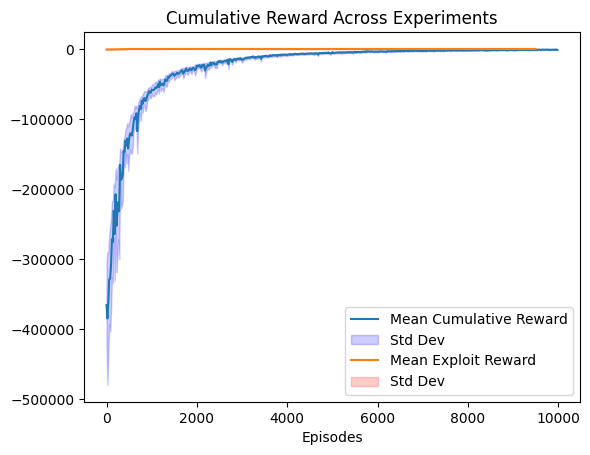

In [63]:
fig, ax = plt.subplots()

ax.plot(np.arange(0, num_episodes, num_episodes/n_windows),
        running_avg(np.mean(aggr_rew, axis=0), n_windows), label='Mean Cumulative Reward')
ax.fill_between(np.arange(0, num_episodes, num_episodes/n_windows),
                running_avg(np.mean(aggr_rew, axis=0) - np.std(aggr_rew, axis=0)/ np.sqrt(aggr_rew.shape[0]), n_windows),
                running_avg(np.mean(aggr_rew, axis=0) + np.std(aggr_rew, axis=0)/ np.sqrt(aggr_rew.shape[0]), n_windows),
                color='b', alpha=0.2, label='Std Dev')
ax.plot(np.arange(0, num_episodes, num_episodes/n_windows_exploit),
        running_avg(np.mean(exploit_rew, axis=0), n_windows_exploit), label='Mean Exploit Reward')
ax.fill_between(np.arange(0, num_episodes, num_episodes/n_windows_exploit),
                running_avg(np.mean(exploit_rew, axis=0) - np.std(exploit_rew, axis=0)/ np.sqrt(exploit_rew.shape[0]), n_windows_exploit),
                running_avg(np.mean(exploit_rew, axis=0) + np.std(exploit_rew, axis=0)/ np.sqrt(exploit_rew.shape[0]), n_windows_exploit),
                color='r', alpha=0.2, label='Std Dev')
ax.set_title('Cumulative Reward Across Experiments')
ax.set_xlabel('Episodes')
ax.legend()

In [64]:
expl_trains = np.zeros((len(list_dir), num_exploit))
for i, out_dir in enumerate(list_dir):
    arrived_trains = np.load(os.path.join(out_dir, "arrived_trains_exploit.npz"))
    expl_trains[i, :] = arrived_trains["x"]

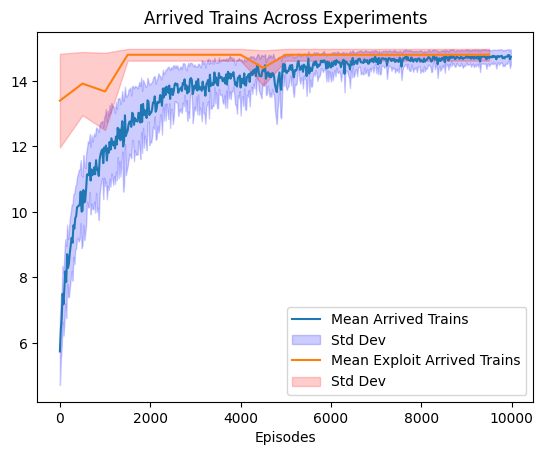

In [65]:
fig, ax = plt.subplots()

ax.plot(np.arange(0, num_episodes, num_episodes/n_windows),
        running_avg(np.mean(aggr_trains, axis=0), n_windows), label='Mean Arrived Trains')
ax.fill_between(np.arange(0, num_episodes, num_episodes/n_windows),
                running_avg(np.mean(aggr_trains, axis=0) - np.std(aggr_trains, axis=0) / np.sqrt(aggr_trains.shape[0]), n_windows),
                running_avg(np.mean(aggr_trains, axis=0) + np.std(aggr_trains, axis=0) / np.sqrt(aggr_trains.shape[0]), n_windows),
                color='b', alpha=0.2, label='Std Dev')
ax.plot(np.arange(0, num_episodes, num_episodes/n_windows_exploit),
        running_avg(np.mean(expl_trains, axis=0), n_windows_exploit), label='Mean Exploit Arrived Trains')
ax.fill_between(np.arange(0, num_episodes, num_episodes/n_windows_exploit),
                running_avg(np.mean(expl_trains, axis=0) - np.std(expl_trains, axis=0) / np.sqrt(expl_trains.shape[0]), n_windows_exploit),
                running_avg(np.mean(expl_trains, axis=0) + np.std(expl_trains, axis=0) / np.sqrt(expl_trains.shape[0]), n_windows_exploit),
                color='r', alpha=0.2, label='Std Dev')
ax.set_title('Arrived Trains Across Experiments')
ax.set_xlabel('Episodes')
ax.legend()


# Eval

In [36]:
def barplot(list_dir, num_evals, num_agents):
    hist_data = np.zeros((len(list_dir*num_evals), 3))

    for idx, exp_dir in enumerate(list_dir):
        
        data = np.zeros((num_evals, 3))
        for i in range(num_evals):

            delays = np.load(os.path.join(exp_dir, f"eval_{i}", "delays.npz"))
            delays = delays["x"]

            trains_at_dest = np.load(os.path.join(exp_dir, f"eval_{i}", "trains_at_dest.npz"))
            trains_at_dest = trains_at_dest["x"]

            mask = np.zeros(num_agents).astype(bool)
            mask[trains_at_dest] = True
            arrived_negatives = np.sum(mask & (delays <= 0))
            arrived_positives = np.sum(mask & (delays > 0))
            not_arrived = np.sum(~mask)

            data[i, :] = [arrived_negatives, arrived_positives, not_arrived]

        hist_data[idx*num_evals:idx*num_evals+num_evals] = data
        
    labels = ['Arrived Early', 'Arrived Late', 'Not Arrived']

    fig, ax = plt.subplots()
    ax.bar(labels, np.mean(hist_data, axis=0), yerr=np.std(hist_data, axis=0)/np.sqrt(hist_data.shape[0]), capsize=5)
    ax.hlines(num_agents, xmin=-0.5, xmax=2.5, color='r', linestyle='--', label='Total # of Trains')
    ax.set_title('Train Arrival Status')
    ax.set_ylabel('Number of Trains')
    plt.show()

    return hist_data

In [37]:
list_dir = [
    "/home/gianvito/Desktop/flatland_exp/100_agents_challenge/exp_0/seed_0",
    "/home/gianvito/Desktop/flatland_exp/100_agents_challenge/exp_0/seed_1",
    "/home/gianvito/Desktop/flatland_exp/100_agents_challenge/exp_0/seed_2",
    "/home/gianvito/Desktop/flatland_exp/100_agents_challenge/exp_0/seed_3",
    "/home/gianvito/Desktop/flatland_exp/100_agents_challenge/exp_0/seed_4",
]

num_agents = 200
num_evals = 1


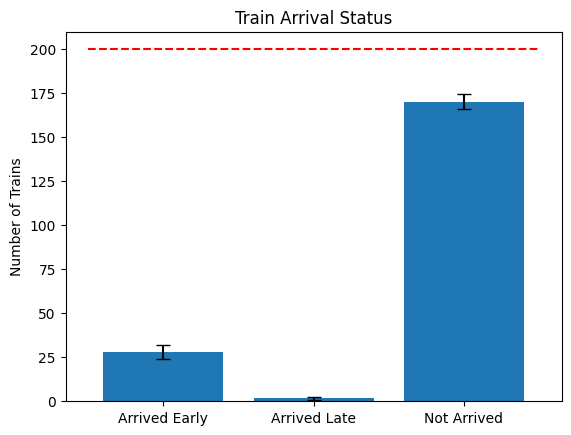

In [38]:
hist_data = barplot(list_dir, num_evals, num_agents)

In [ ]:
list_dir = [
    "/home/gianvito/Documents/flatland-baselines/100_agents_challenge/seed_0",
    "/home/gianvito/Documents/flatland-baselines/100_agents_challenge/seed_1",
    "/home/gianvito/Documents/flatland-baselines/100_agents_challenge/seed_2",
    "/home/gianvito/Documents/flatland-baselines/100_agents_challenge/seed_3",
    "/home/gianvito/Documents/flatland-baselines/100_agents_challenge/seed_4",
]

num_agents = 100
num_evals = 1

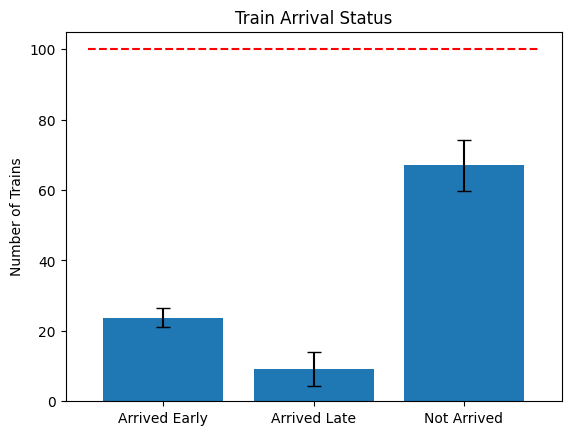

In [27]:
hist_data_2 = barplot(list_dir, num_evals, num_agents)

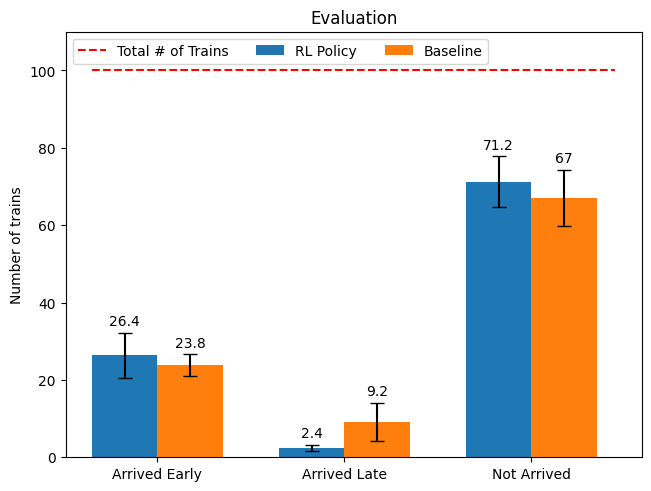

In [29]:
means = {
    'RL Policy': [np.mean(hist_data, axis=0), np.std(hist_data, axis=0) / np.sqrt(hist_data.shape[0])],
    'Baseline': [np.mean(hist_data_2, axis=0), np.std(hist_data_2, axis=0) / np.sqrt(hist_data_2.shape[0])]
}

labels = ['Arrived Early', 'Arrived Late', 'Not Arrived']
x = np.arange(3)  # the label locations
width = 0.35  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, [round(x,2) for x in measurement[0]], width, yerr=measurement[1], label=attribute, capsize=5)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Evaluation')
ax.set_xticks(x + width, labels)
ax.set_ylabel("Number of trains")
ax.hlines(num_agents, xmin=0, xmax=2.8, color='r', linestyle='--', label='Total # of Trains')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0,num_agents+10)

plt.show()

In [69]:
list_dir = [
    "/home/gianvito/Documents/flatland-baselines/15_agents_hp_malf_easy/seed_0",
    "/home/gianvito/Documents/flatland-baselines/15_agents_hp_malf_easy/seed_1",
    "/home/gianvito/Documents/flatland-baselines/15_agents_hp_malf_easy/seed_2",
    # "/home/gianvito/Documents/flatland-baselines/40_agents_hp_malf_easy/seed_3/",
    # "/home/gianvito/Documents/flatland-baselines/40_agents_hp_malf_easy/seed_4/"
]

num_agents = 15
num_evals = 10

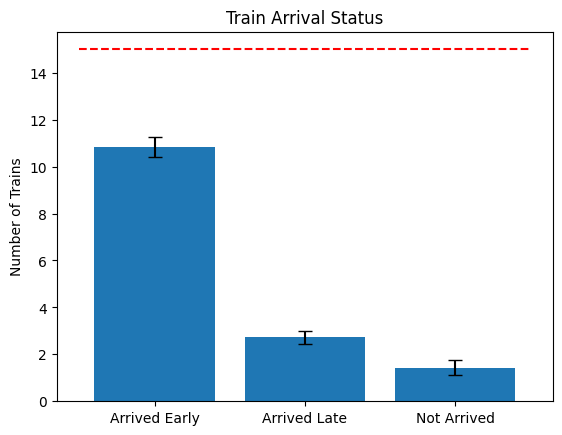

In [70]:
hist_data_3 = barplot(list_dir, num_evals, num_agents)

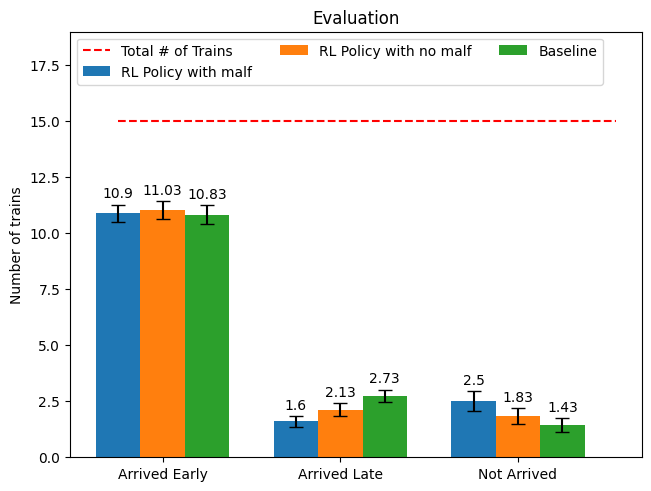

In [71]:
means = {
    'RL Policy with malf': [np.mean(hist_data, axis=0), np.std(hist_data, axis=0) / np.sqrt(hist_data.shape[0])],
    'RL Policy with no malf' : [np.mean(hist_data_2, axis=0), np.std(hist_data_2, axis=0)/np.sqrt(hist_data_2.shape[0])],
    'Baseline': [np.mean(hist_data_3, axis=0), np.std(hist_data_3, axis=0)/np.sqrt(hist_data_3.shape[0])]
}

labels = ['Arrived Early', 'Arrived Late', 'Not Arrived']
x = np.arange(3)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, [round(x,2) for x in measurement[0]], width, yerr=measurement[1], label=attribute, capsize=5)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Evaluation')
ax.set_xticks(x + width, labels)
ax.set_ylabel("Number of trains")
ax.hlines(num_agents, xmin=0, xmax=2.8, color='r', linestyle='--', label='Total # of Trains')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0,num_agents+4)

plt.show()